In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [4]:
df = pd.read_csv('csv_202203_202309/202203-divvy-tripdata.csv')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.886875,-87.626030,41.877708,-87.635321,member
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.911722,-87.626804,41.877945,-87.662007,member


In [5]:
# start_station_idとend_station_idでエッジリストを作成
df_edge = df[['start_station_id', 'end_station_id']]
df_edge = df_edge.groupby(['start_station_id', 'end_station_id']).size().reset_index()
df_edge.columns = ['start_station_id', 'end_station_id', 'count']
df_edge.head()

,start_station_id,end_station_id,count
0,13001,13001,84
1,13001,13006,6
2,13001,13008,31
3,13001,13011,26
4,13001,13016,13


In [43]:
# dfを1日単位で分割する
# NMPlot
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

current_timestamp = df['started_at'].min()
end_timestamp = df["started_at"].max()
interval = timedelta(days=1)

node_list = []
edge_list = []

while current_timestamp <= end_timestamp:
    next_timestamp = current_timestamp + interval
    df_tmp = df[(df['started_at'] >= current_timestamp) & (df['started_at'] < next_timestamp)]

    # もしdf_tmpの各行でstart_station_nameとend_station_nameが同じならば、その行は落とす
    

    unique_list = []
    s_station = df_tmp["start_station_name"]
    e_station = df_tmp["end_station_name"]

    unique_list = s_station + e_station
    unique_list = unique_list.unique()

    node_list.append(len(unique_list))
    edge_list.append(len(df_tmp))
    
    current_timestamp = next_timestamp


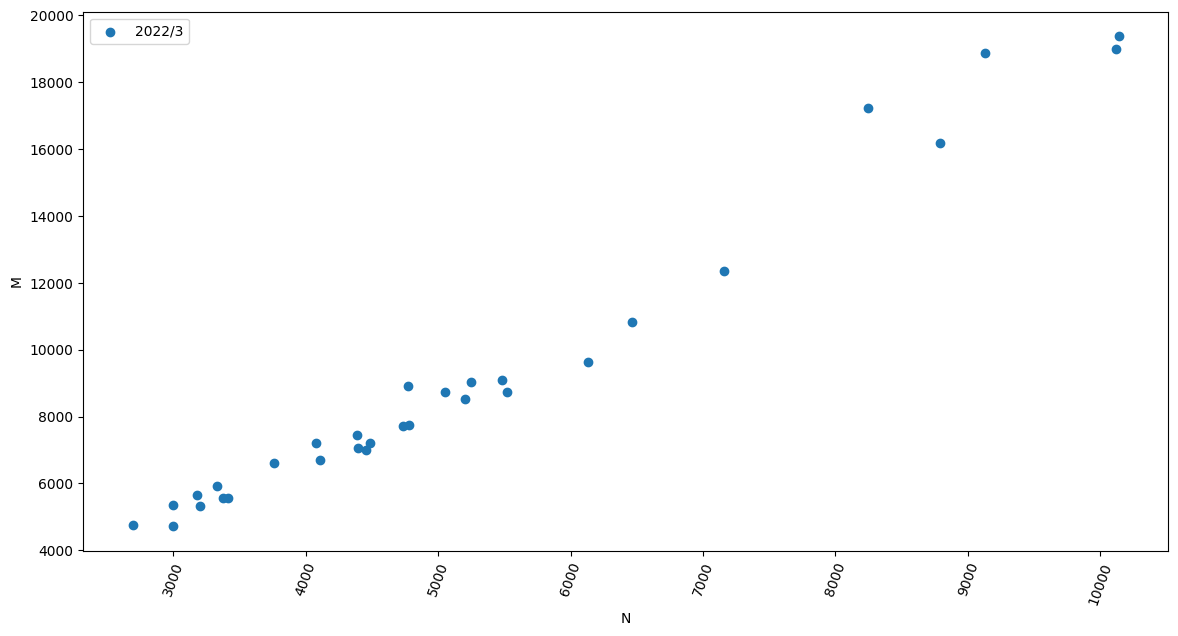

In [44]:
plt.figure(figsize=(14,7))
plt.scatter(node_list, edge_list, label="2022/3")
plt.xticks(rotation=70)
plt.xlabel("N")
plt.ylabel("M")
plt.legend()
plt.show()

In [25]:
df.astype("str").describe()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,284042,284042,284042,284042,284042,284042,284042,284042,284042,284042,284042,284042,284042
unique,284042,3,255089,255324,844,844,835,835,81725,80756,926,916,2
top,47EC0A7F82E65D52,electric_bike,2022-03-05 16:51:30,2022-03-21 11:45:09,nan,nan,nan,nan,41.79,-87.6,41.79,-87.6,member
freq,1,141245,6,10,47246,47246,51157,51157,5859,6622,5998,6783,194160
